<a href="https://colab.research.google.com/github/khairihr/MachineLearning/blob/main/TaskWeek8/SVM_Salary_Khairi_Hibatullah_Ridho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Khairi Hibatullah Ridho

NIM : 1103228240


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd

file_path = '/content/drive/MyDrive/Dataset MachineLearning/Salary_Data.csv'
# Ganti 'nama_file.csv' dengan nama file CSV yang sesuai
df = pd.read_csv(file_path)

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [18]:
# Contoh DataFrame
data = pd.DataFrame({
    'Age': [25, 30, None, 35],
    'Gender': ['Male', 'Female', 'Male', 'Female'],
    'Education Level': ['Bachelor', 'Master', 'PhD', 'Bachelor'],
    'Job Title': ['Engineer', 'Manager', 'Analyst', 'Director'],
    'Years of Experience': [3, 5, None, 8],
    'Salary': [60000, 80000, None, 120000]
})

# Menghapus nilai NaN dari DataFrame berdasarkan kolom tertentu
columns_to_drop_na = ['Age', 'Education Level', 'Years of Experience', 'Salary']
data_cleaned = data.dropna(subset=columns_to_drop_na)

# Menampilkan DataFrame setelah menghapus nilai NaN
print(data_cleaned)


    Age  Gender Education Level Job Title  Years of Experience    Salary
0  25.0    Male        Bachelor  Engineer                  3.0   60000.0
1  30.0  Female          Master   Manager                  5.0   80000.0
3  35.0  Female        Bachelor  Director                  8.0  120000.0





 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object
 2   Education Level      6701 non-null   object
 3   Job Title            6702 non-null   object
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB

beri kode untuk hilangkan nan yang ada di data ini

In [19]:
# Import library
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Data
# Gantilah bagian ini dengan data Anda
X = df['Years of Experience'].values.reshape(-1, 1)
y = df['Salary'].values

# Menangani nilai NaN dengan menggantinya dengan nilai rata-rata
X = np.nan_to_num(X, nan=np.nanmean(X))
y = np.nan_to_num(y, nan=np.nanmean(y))

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Inisialisasi model SVR dengan hyperparameter tertentu
svr_model = SVR(C=1000, gamma=0.05, kernel='rbf')

# Melatih model
svr_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = svr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Sekarang model SVR dengan hyperparameter yang telah ditentukan sudah dilatih dan diuji.
# Anda dapat menggunakannya untuk membuat prediksi pada data baru.

Mean Squared Error: 803287606.1532804


berikan kode untuk model svm dengan fitur dan target nya ini

X = df['Years of Experience']

y = df['Salary']

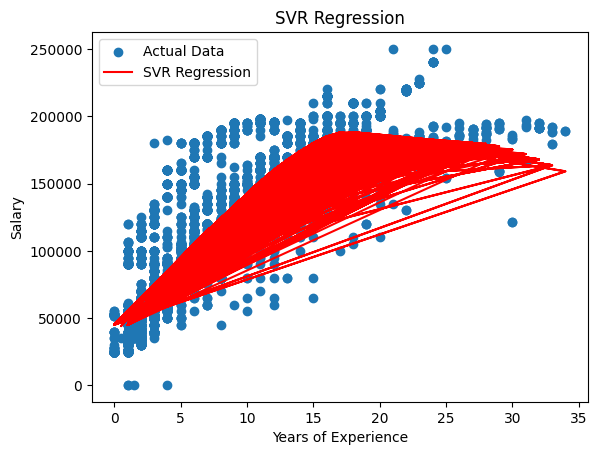

In [21]:
import matplotlib.pyplot as plt

# Visualisasi data dan model
plt.scatter(X, y, label='Actual Data')
plt.plot(X, svr_model.predict(X), color='red', label='SVR Regression')

# Label sumbu
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Menambahkan judul
plt.title('SVR Regression')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV

# Tentukan hyperparameter yang akan diuji
param_grid = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(svr_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Gunakan model terbaik untuk membuat prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Parameters: {'C': 10000, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Squared Error on Test Set: 770655356.461278


In [23]:
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, gamma=0.005)

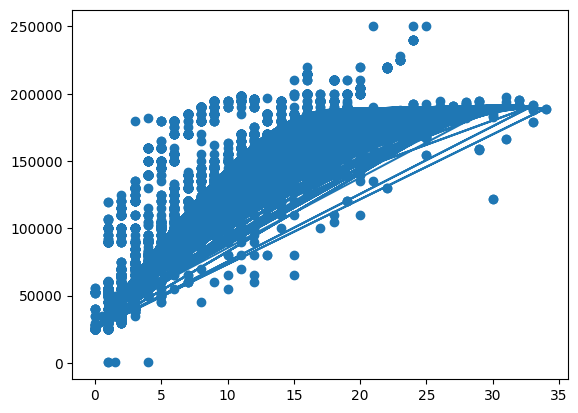

In [24]:
#visualisasikan model
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))